# Python beginners course - Level 4 - Scikit-learn (machine learning)
One of the reasons Python has become so popular in the last decade is its rich ecosystem of libraries that can be used for various applications. Currently one of the biggest applications of Python is in the field of `machine learning`. The fact that Python has become the de facto programming language in this area can be largely attributed to the package `scikit-learn`, a machine learning package which makes it increadibly convenient to:
- prepare your data such that it can be used for machine learning
- create and train a machine learning model
- evaluate the performance of your model
- use your model to make predictions

This notebook will go through the functionality of `scikit-learn` and demonstrate the power of the package in the area of machine learning.


## 1. What is machine learning
To illustrate what machine learning is, assume you have the following sequence of numbers
- 3 - 9
- 4 - 16
- 5 - 25
- 9 - **X**

What number should be at **X**? Quite easy right? 

This exercise is easy for humans, because our brains are capable of `learning from experience`, we learn the pattern from the given data and we are able to apply this to new data. However, this exercise is not so easy for computers as they do not inherently have this creative capability, we have to give computers a framework to learn. This is exactly what `machine learning` is, it is providing the computer with a structured framework with which the computer is able to learn from experience.

These frameworks are often referred to as algorithms and models, which the computer uses to perform a specific task without using explicit instructions. For example, if we would try to teach a computer to learn what **X** should be, we wouldn't give it any instructions apart from:

    "Given the sequence (3,9), (4,16), (5,25), (9,X), find out the value of X."

It is then up to the model to find the relation in the given sequence.

In machine learning, quite a lot of terminilogy is used. Here we will explain the most important terms:
- **Target**: this is the value you are trying to predict. In our example, we are trying to predict the second number, given the first number. Therefore, the numbers 9, 16, 25, X are our targets.


- **Feature(s)**: The input numbers 3,4,5,9 are what we call features, we use them to predict the target. In our example we only have 1 feature, but in almost all real-life problems you have many more features.


- **Training data**: In our example, we used the three first sets of numbers to learn the pattern. These sets are what we refer to as training data; we use this data to train our model.


- **Test data**: Once we have trained our model, we want to assess how well our model was able to learn the patterns in the data. Therefore, we use a set of data on which we test our data; the training data. 


- **Prediction**: When training a model, you both have features and a target. For example in our case, we both have the feature 5 and the target 25. However, after training we want to use our model to determine the squared value of any number that we give it. In other words, we want to give the model a number and it should predict the squared value of that number.


- **Evaluation**: Given a trained model, you want to be able to assess how well the model has learned the patterns in the data. For this we evaluate our model on the test data. In our example, the numbers (9,81), (10,100) could be a test set. We would then use our model to predict the target given the feature 9 (and 10) and compare it to the actual value 81 (and 100). Calculating the difference between our predicted value and the actual value gives a measure for how well the model performs.

These terms will be frequently used such that the reader can get familiarized with them as much as possible.

The example given above is a relatively easy problem. However, the applications of machine learning extend to almost any area. Some real-life applications where machine learning is currently being used are

- Self-driving car software
- Analyzing MRI brain scans to detect tumours
- E-mail filtering for spam
- Fraud detection
- Forecasting (product demands, weather, exchange rates, stock prices, ...)
- Virtual assistants (chat bot, voice bot, ...)
- Online recommendations (Netflix movies, Facebook friends, Amazon products, ...)
- Sentiment analysis in written text
- News classification
- Speech recognition


In this notebook, we will again be using the `Boston dataset` which we have used in the previous notebooks. We will use some of the features (columns) of the data to predict the house price (target). As features we will be using:

| Feature        | Represents                                      |
| :------------- |------------------------------------------------ | 
| RM | average number of rooms per dwelling|
| LSTAT | percentage lower status of the population|

and our target will be

| Target        | Represents                                      |
| :------------- |------------------------------------------------ | 
| MEDV | Median value of owner-occupied homes (1 = 1000 dollar)|

In order to predict our target, we will take the following steps

2. Prepare the data
3. Choose the model(s)
4. Train the model(s)
5. Evaluate the model(s)
6. Predict the target

In [2]:
# Import the packages that we will be using
import numpy as np    # NumPy
import pandas as pd   # Pandas
import sklearn        # Scikit-learn

## 2. Preparing the data

Data preparation is the process of transforming raw data so that data scientists and analysts can run it through machine learning algorithms to uncover insights or make predictions.

The data preparation process can be complicated by issues such as:

1. **Missing or incomplete records.** It is difficult to get every data point for every record in a dataset. Missing data sometimes appear as empty cells or a particular character, such as a question mark.


2. **Improperly formatted data.** Data sometimes needs to be extracted into a different format or location. A good way to address this is to consult domain experts or join data from other sources.


3. **The need for techniques such as feature engineering.** Even if all of the relevant data is available, the data preparation process may require techniques such as feature engineering to generate additional content that will result in more accurate, relevant models. For example, you might want to extract the 'month of year', 'week of month' or 'day of month' from a date.


4. **Splitting the data.** In order to assess the performance of a model, we need to have a dataset. Therefore, the dataset needs to be split into a training and test set. The model will be trained on the training set, and then the performance will be assessed on the test set.

In the `Boston dataset`, the first three steps have already been performed. Thus we only need to split our data into a training and test set.

Before we start splitting our data, we must first load our data.

In [10]:
# Load our data
data = pd.read_csv('../data/boston_dataset.csv')
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


From our data, we see that we have a lot more columns than the ones we will be using (RM, LSTAT and MEDV). We will begin by throwing away all the data that we do not need.

### Exercise: select only the RM, LSTAT and MEDV columns from the data
Replace the ```___``` in the following cell to complete the exercise.

In [ ]:
# Select only the columns RM, LSTAT and MEDV from data
data = data[[___]]

# Print the obtained Dataframe
data.head()

Now that we have removed all the features that we will not be using, we will split the data into a training set on which the models will be trained, and a test set on which the model's performance will be assessed. Remember from the `Pandas` notebook that we can select rows from a Dataframe using `.iloc`:

In [21]:
# Take the first 5 rows of data
first_5_rows = data.iloc[0:5]

# Print the first 5 rows to the screen
first_5_rows

,RM,LSTAT,MEDV
0,6.575,4.98,24.0
1,6.421,9.14,21.6
2,7.185,4.03,34.7
3,6.998,2.94,33.4
4,7.147,5.33,36.2


We want to split our data such that approximately 80% of the rows is in the training set and the remaining 20% is the test set. To create such distribution, we first need to know how many rows our data has.

In [22]:
# Print the number of columns
print('The data has {} columns'.format(data.shape[1]))

# Print the number of rows
print('The data has {} rows'.format(data.shape[0]))

The data has 3 columns
The data has 506 rows


The data has 506 rows. This means that we want 404 rows (80% of 506) in our training data set, and 102 rows in our test data set.

### Exercise: Split the data into two parts:
1. A training data set with the first 404 rows of the data
2. A test data set with the remaining 102 rows of the data

Replace the ```___``` in the following cell to complete the exercise.

In [ ]:
data_train = data.iloc[___]
data_test  = data.iloc[___]
    
print('The training data set has {} rows'.format(data_train.shape[0]))
print('The test data set has {} rows'.format(data_test.shape[0]))

Our training and test data sets contain both the features (RM, LSTAT) and the target (MEDV) that we are trying to predict. We also want to split our features from the target.

We can do this very easily with the datasets we just created.

In [23]:
# X is almost always used to denote the variable containing the features
X_train = data_train[['LSTAT', 'RM']]

# y is almost always used to denote the variable containing the target
y_train = data_train['MEDV']

### Exercise: split the test data set into features and target.
Replace the ```___``` in the following cell to complete the exercise.

In [ ]:
X_test = ___
y_test = ___

We have now manually split the data in a training set and a test set, and split the target from the features. However, we as programmers are lazy and do not want to do this manually... So let's use a library that can do this for us! (but does exactly the same as we just did!)

If you did not already guess so, `scikit-learn` can do this for us.

In [29]:
# Import the function that can do the splitting
from sklearn.model_selection import train_test_split

# Perform the splitting between training/test and features/target
X_train, X_test, y_train, y_test = train_test_split(data[['LSTAT', 'RM']], data['MEDV'], test_size=0.20, random_state=42)

# Print the results
print('The training data set has {} rows'.format(X_train.shape[0]))
print('The test data set has {} rows'.format(X_test.shape[0]))

The training data set has 404 rows
The test data set has 102 rows


## 3. Choosing the model(s)
In our dataset, we have a set of features (RM, LSTAT) and we are trying to predict the house price (our target, MEDV). This is a classic example of a regression problem, where we are trying to find the relation between features and a target. 

To illustrate regression, imagine we only have 1 feature and our target. Visualizing our data, it could look something like the blue dots in the figure below. The challenge would then be to find a function (red line) that fits our data best, which in this case is a linear line (Linear Regression).

<img src="../assets/linear-regression.png" alt="drawing" width="400"/>

Choosing the model that does this best for an arbitrary dataset is not trivial. Usually, many different types of models are trained. Each of them is then evaluated on the test data set, to check how 'good' they fit the data and the one with the best performance is used. However, since the process of training and checking the performance is often very costly, data scientists try to find information in the dataset that hints at using a specific type of model.

For example, if you have made some visualizations of the data and figured out that there is a strong linear correlation between the features and the target, you would not want to use a non-linear model. An example of those visualizations is given below, from which a linear relation between the features and target becomes obvious.

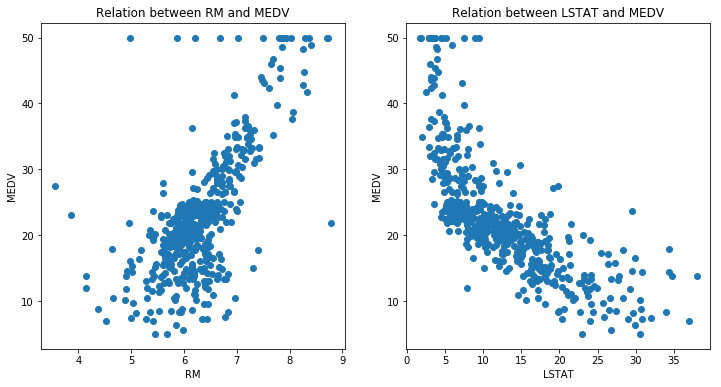

In [43]:
import matplotlib.pyplot as plt

plt.subplots(figsize=[12,6])

# Visualize relation between the feature RM and the target MEDV
plt.subplot(121)
plt.scatter(data['RM'], data['MEDV'])
plt.title('Relation between RM and MEDV')
plt.xlabel('RM')
plt.ylabel('MEDV')

# Visualize relation between the feature LSTAT and the target MEDV
plt.subplot(122)
plt.scatter(data['LSTAT'], data['MEDV'])
plt.title('Relation between LSTAT and MEDV')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')

# Show the figure
plt.show()

## 4. Training the model(s)
For our problem, we will be training two different types of models:
- Linear regression model
- Random forest model (used for example in the Quick-Pay algorithm)

The market standard library for making these models in Python is `sklearn`. The main reason for this is (as we will see) that it is **very** easy to make and train machine learning models using this library.

In [ ]:
# Import the model we want to use from sklearn
from sklearn.linear_model import LinearRegression

# Create an estimator (not officially a model yet, since we haven't trained it yet)
linear_regression_estimator = LinearRegression()

# Fit the estimator, now we have a model!
linear_regression_model = linear_regression_estimator.fit(X_train, y_train)

That's it! We now have a linear regression model with which we can predict our target.

Let's do the same, but now for a Random Forest model.

**Exercise:**
1. Create a Random Forrest estimator
2. Fit the estimator to create the model

In [ ]:
# Import the Random Forrest model from sklearn
from sklearn.ensemble import RandomForestRegressor

# Create an estimator
random_forrest_estimator = ___

# Fit the estimator to create a model
random_forrest_model = ___

### 5. Evaluation
Now that we have our trained machine learning models, we want to know which one of them has the best performance. In order to be able to assess the performance of a model, we need to define how we are going to measure performance. The metrics we will try out are:
- Mean Absolute Error (MAE)
- Mean Squared  Error (MSE)

Let's imagine again that we have 1 feature and our target, and that we have fit a linear regression model to our data, as shown in the figure below. We then can calculate our metrics as follows:
- MAE: calculate the distance from each point to our model (red line), add all of these distances, and divide by the number of points we have (in this case 7). [More info](https://en.wikipedia.org/wiki/Mean_absolute_error).
- MSE: calculate the distance from each point to our model (red line), square these values and add all of them, and divide by the number of points we have (in this case 7). [More info](https://en.wikipedia.org/wiki/Mean_squared_error).

<img src="../assets/MSE.png" alt="drawing" width="300"/>

Many more metrics exist. The choice often depends on the type of problem that is being solved. For example, if you do not want to have large errors, the MSE metric is preferred.

**Challenge:** Why is the MSE metric preferred for problems where large errors are not wanted?

Let's now calculate the MAE and MSE metrics for the linear regression model. In the code below, we first import both the functions which do this for us; `mean_absolute_error` and `mean_squared_error` respectively.

Then, the predictions of the target `MEDV` are calculated on the test set that we defined. Using the real values and the predicted values, the metrics can then be calculated and printed.

In [ ]:
# Import the metrics that we want to use
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate our predictions for the linear regression model
linear_regression_predictions = linear_regression_model.predict(X_test)

# Calculate the metrics for the linear regression predictions
linear_regression_MAE = mean_absolute_error(y_test, linear_regression_predictions)
linear_regression_MSE = mean_squared_error(y_test, linear_regression_predictions)

# Print the values of the metrics
print('The MAE for the linear regression model = ', linear_regression_MAE)
print('The MSE for the linear regression model = ', linear_regression_MSE)

**Exercise:** 
1. Calculate the predictions for the Random Forrest model
2. Calculate the metrics for the Random Forrest predictions

In [ ]:
# Calculate our predictions for the Random Forrest model
random_forrest_predictions = random_forrest_model.___

# Calculate the metrics for the linear regression predictions
random_forrest_MAE = ___
random_forrest_MSE = ___

# Print the values of the metrics
print('The MAE for the linear regression model = ', ___)
print('The MSE for the linear regression model = ', ___)

**Exercise:** Which of the two models performs best? Why?

Ofcouse, for mathematicians it is nice to see the performance of a model expressed as a number. However, it is much more intuitive to visualize the model.

**Exercise:** Add the Random Forrest predictions to the plot.

In [ ]:
# Set the figure size
fig, ax = plt.subplots(figsize=[16,6])

# Plot the original data
plt.plot(y_test.values, 'k', label='Original data')

# Plot the linear regression predictions
plt.plot(linear_regression_predictions, label='Linear Regression')

# Plot the random forrest predictions
plt.plot(___)

# Show a legend in the plot
plt.legend()
plt.show()

### 6. Hyperparameter tuning

In this course, we trained a Linear regression and Random Forrest model. All machine learning models have a lot of settings (called hyperparameters) that can be changed, in order to improve the performance. Since this is a quite advanced topic, we chose not to include this topic in the course. However, there is plenty of documentation online that nicely describe the concept of hyperparameter tuning. The interested reader is referred to external sources such as:

[Hyperparameter explanation](https://en.wikipedia.org/wiki/Hyperparameter_(machine_learning)) <br>
[Hyperparameter optimization](https://medium.com/criteo-labs/hyper-parameter-optimization-algorithms-2fe447525903)

**Challenge:** Change the hyperparameters of the Random Forrest model (and retrain the model) such that the performance of the MSE metric improves.

In [ ]:
# Create an estimator
random_forrest_estimator = RandomForestRegressor(...)

# Fit the estimator to create a model
random_forrest_model = ...

### 7. Prediction

Now that we have a trained model, we have a mapping between our features and the target (house price). Once a new house comes on the marget now, we do not need any external information to determine the price. We can simply determine the features (number of rooms/total area/...) and predict the price using our model.